# Маркетплейс по продаже новых товаров из Бразилии

Данный маркетплейс недавно появился на рынке и на нем продаются новые товары из Бразилии, которые только начинают поступать в продажу.

Продакт-менеджер данного проекта переживает за свой продукт, так как выручка маркетплейса стоит на месте уже несколько месяцев. Он предложил мне (аналитику) полную свободу действий. Главное — чтобы метрики росли, а команда не причиняла неудобства клиентам.

**Основные задачи проекта:**

- Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.
- Задача 2: Определить, существует ли product/market fit у этого маркетплейса.
- Задача 3: Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.
- Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.
- Задача 5: Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.
- Задача 6: Сформулировать выводы о проделанной работе.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss
import seaborn as sns
from operator import attrgetter

### Формализация проблемы продукта ###

Маркетплейс продает товары из Бразилии, но выручка не растет уже несколько месяцев. Это очень настораживает. Необходимо разобраться, в чем же проблема маркетплейса и решить ее в кратчайшие сроки! Однако, нельзя причинять неудобства клиентам, стоит быть внимательным при выборе гипотез и рассмотрении метрик.

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Задача 1. Оценить месячный retention в оформление заказа с помощью когортного анализа. ##

**Исследовать датасет и определить, какой вид заказа будет учитываться в retention**

Оформление заказа это статус - approved. Так как пользователь находит товары, кладет их в корзину и после этого выбирает необходимые товары и оформляет заказ на покупку нужных товаров, т.е. подтверждает свой заказ.

**Построить месячный retention**

In [10]:
# Переводим даты в тип datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Копируем датасет и удаляем даты ненужных статусов
orders_copy = orders.copy()
orders_copy = pd.merge(orders_copy, customers, on='customer_id')
orders_copy = orders_copy.drop(['order_delivered_customer_date', 'order_estimated_delivery_date', \
                                'customer_zip_code_prefix'], axis=1)

# Отюираем только пользователей со статусом "delivered"
orders_copy = orders_copy.query('order_status == "delivered"')

In [11]:
# Создаем колонки отдельно с днем создания заказа для нахождения когорт в будущем
orders_copy['order_period'] = orders_copy['order_purchase_timestamp'].dt.to_period('M')
orders_copy['order_period_day'] = orders_copy['order_purchase_timestamp'].dt.to_period('D')
orders_copy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,customer_unique_id,customer_city,customer_state,order_period,order_period_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2017-10,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,af07308b275d755c9edb36a90c618231,barreiras,BA,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,2018-02,2018-02-13


In [12]:
# Группируем пользователей по их ниаменьшему времени оформления заказа и выделяем оттуда дни
orders_copy['cohort'] = orders_copy.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
orders_copy['cohort_day'] = orders_copy.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')
orders_copy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,customer_unique_id,customer_city,customer_state,order_period,order_period_day,cohort,cohort_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2017-10,2017-10-02,2017-09,2017-09-04
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,af07308b275d755c9edb36a90c618231,barreiras,BA,2018-07,2018-07-24,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,2018-08,2018-08-08,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,2018-02,2018-02-13,2018-02,2018-02-13


In [13]:
# Выделяем количество месяцев с по частоте заказов пользователей
orders_copy['period_number_month'] = ((orders_copy.order_period_day - orders_copy.cohort_day) / np.timedelta64(30, 'D')).apply(np.floor)
orders_copy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,customer_unique_id,customer_city,customer_state,order_period,order_period_day,cohort,cohort_day,period_number_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,af07308b275d755c9edb36a90c618231,barreiras,BA,2018-07,2018-07-24,2018-07,2018-07-24,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,2018-02,2018-02-13,2018-02,2018-02-13,0.0


In [14]:
# Группируем пользователей по когортам
orders_cohort = orders_copy.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()
orders_cohort.head()

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [22]:
cohort_pivot = orders_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


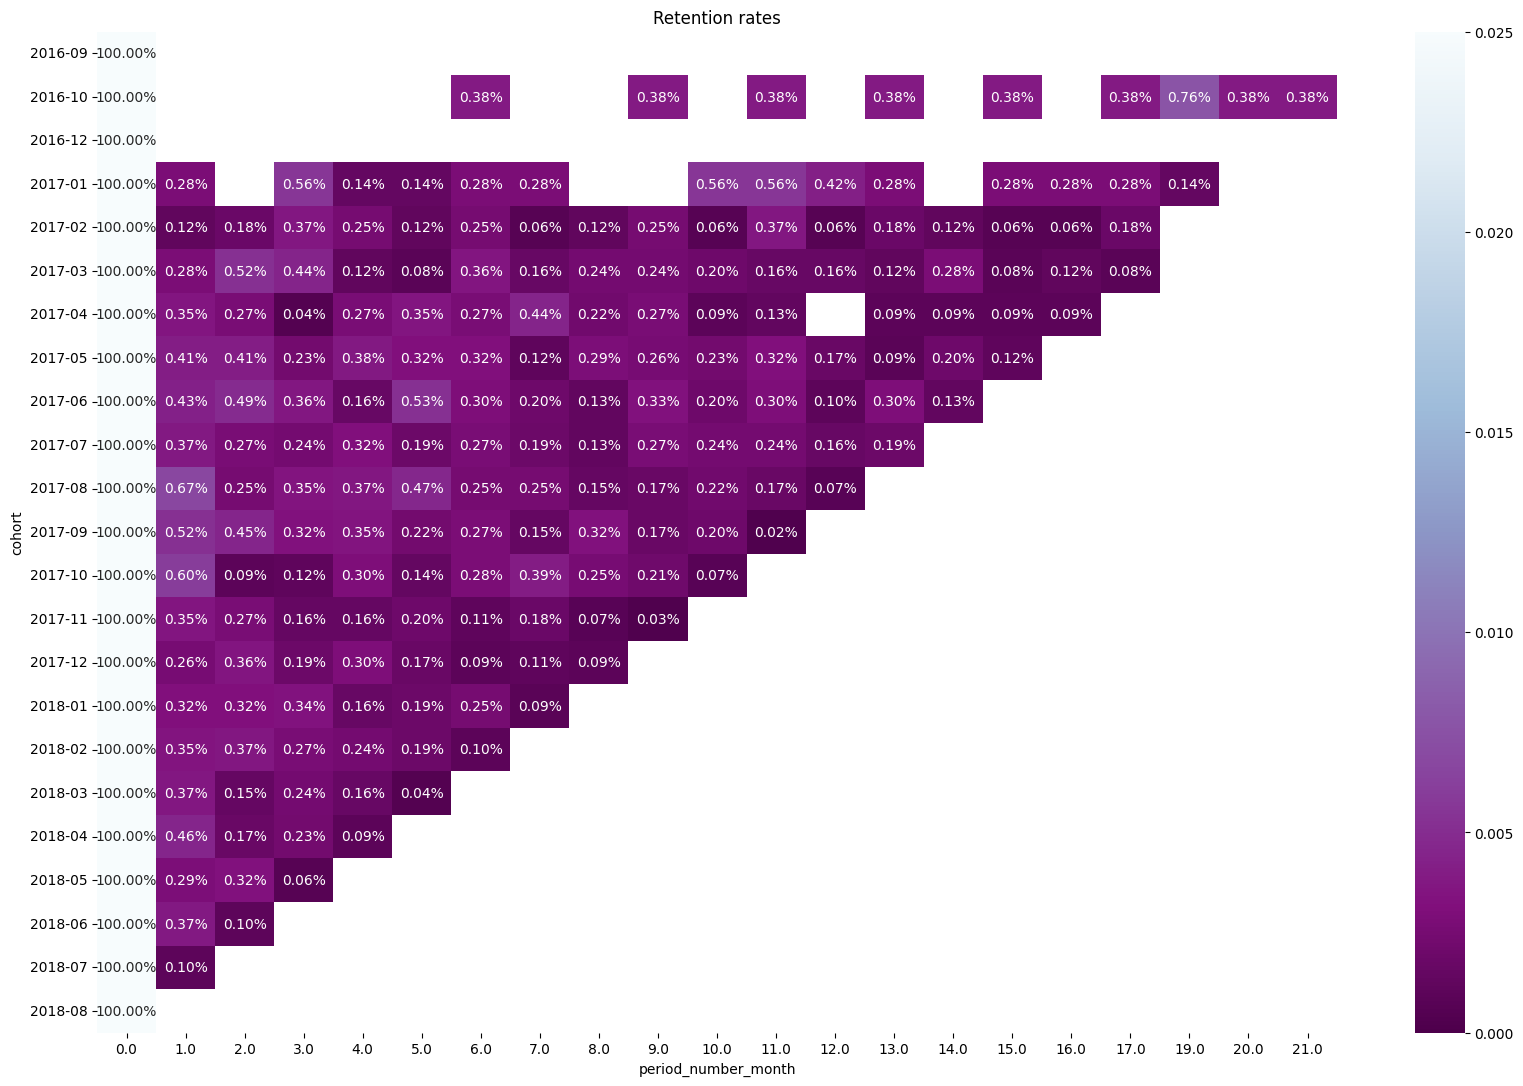

In [23]:
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

plt.figure(figsize=(20, 13))
plt.title('Retention rates')
sns.heatmap(data=retention_matrix, annot = True, fmt = '.2%', vmin = 0.0, vmax = 0.025, cmap="BuPu_r")
plt.show()

**Проанализировать, чему равен медианный retention 1-го месяца (т.е. взять retention 1-ого месяца для всех когорт и посчитать по этим числам медиану)**

In [17]:
first_month_retention = retention_matrix[1].median()
print(f"Медианный retention 1-го месяца: {first_month_retention:.4f}%")

Медианный retention 1-го месяца: 0.0035%


**Найти когорту с самым высоким retention на 3-й месяц.**

In [18]:
retention_matrix[retention_matrix[3] == retention_matrix[3].max()].index[0]

Period('2017-01', 'M')

Когорта с самым большим retention на 3-й месяц: **2017-01**

## **Выводы по задаче 1** ##

**Retention падает с 100% в первый месяц до 3% ко 2-му месяцу, что очень плохо.**

**Наибольший отток происходит после первого заказа — только 3% клиентов возвращаются во второй месяц.**

**Выявлена проблемные когорты - первая, так как не успевает проходить и месяца, как клиенты уже уходят.**

**Возможно, стоит пересмотреть систему оплаты на маркетплейсе.**

## Задача 2. Определить, существует ли product/market fit у маркетплейса. ##

  Оценить наличие product/market fit у данного продукта с помощью когортного анализа, полученного на предыдущем шаге.

  Пояснить свою позицию и сформулировать, на чём маркетплейс должен сконцентрироваться в ближайшее время. Если PMF есть, то в какую сторону лучше развивать продукт дальше? Если PMF нет, то какие причины могут быть у этого?

In [19]:
print(f"Медианный retention 1-го месяца: {first_month_retention:.4f}%")
print(f"Медианный retention 3-го месяца: {retention_matrix[3].median():.4f}%")
print(f"Медианный retention 5-го месяца: {retention_matrix[5].median():.4f}%")
print(f"Медианный retention 7-го месяца: {retention_matrix[7].median():.4f}%")
print()
print(f"MAU 1-го месяца: {cohort_pivot[1].sum():.0f}")
print(f"MAU 3-го месяца: {cohort_pivot[3].sum():.0f}")
print(f"MAU 5-го месяца: {cohort_pivot[5].sum():.0f}")
print(f"MAU 7-го месяца: {cohort_pivot[7].sum():.0f}")

Медианный retention 1-го месяца: 0.0035%
Медианный retention 3-го месяца: 0.0024%
Медианный retention 5-го месяца: 0.0019%
Медианный retention 7-го месяца: 0.0018%

MAU 1-го месяца: 319
MAU 3-го месяца: 178
MAU 5-го месяца: 132
MAU 7-го месяца: 92


## **Выводы по задаче 2** ##

**PMF отсутствует, так как Retention и MAU сильно ухудшаются после первого месяца, особенно это видно на Retention. Люди не возвращаются после одного месяца пользования, а это значит, что проблема где-то в логистике маркетплейса, либо же в наших партнерах с некачественной продукцией.**

## Задача 3. Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании. ##

Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

  1. Первая метрика должна отражать рост объёма продаж маркетплейса.

  2. Вторая — показывать объем аудитории, которой продукт доставляет ценность.

  3. Третья — отражать заинтересованность новых клиентов в продукте.

  4. Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.

  5. Пятая — отражать денежное выражение вовлеченности клиента.

Визуализируйте 1, 2, 4 и 5 метрики.

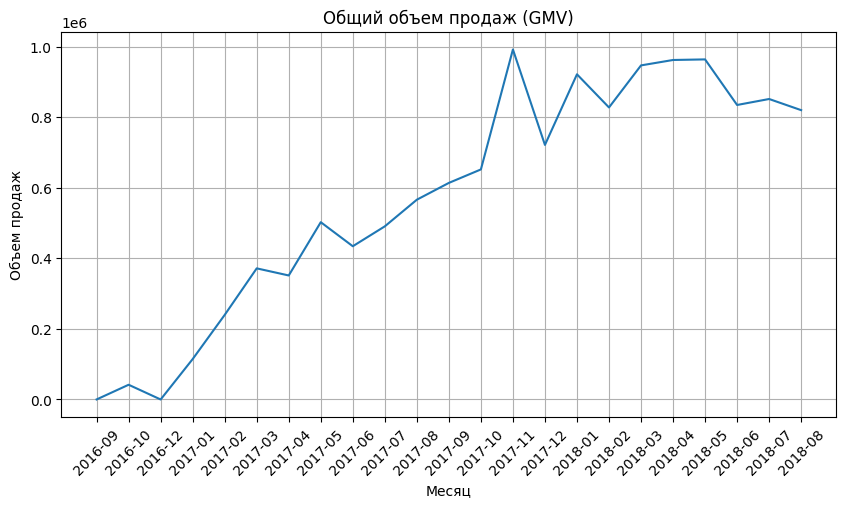

In [20]:
# 1. GMV (Gross Merchandise Volume) - Общий объем продаж
metrics = pd.merge(orders_copy, order_items, on='order_id', how='inner')
first_metric = metrics.groupby('cohort').agg({'price':'sum'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(first_metric['cohort'].astype(str), first_metric['price'])
plt.title('Общий объем продаж (GMV)')
plt.xlabel('Месяц')
plt.ylabel('Объем продаж')
plt.xticks(rotation=45)
plt.grid()
plt.show()

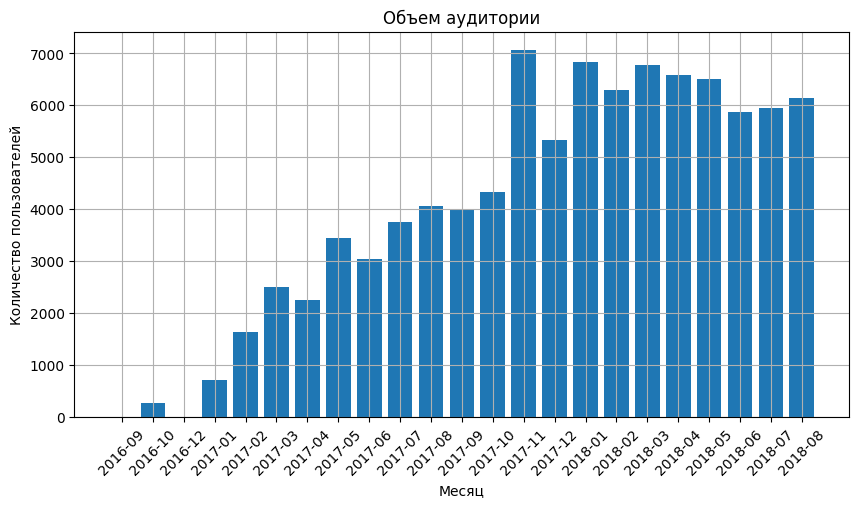

In [21]:
# 2. Active Customers - Размер аудитории
second_metric = metrics.groupby('cohort')['customer_unique_id'].nunique().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(second_metric['cohort'].astype(str), second_metric['customer_unique_id'])
plt.title('Объем аудитории')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# 3. Конверсия новых пользователей
new_users = metrics.groupby('cohort').size().reset_index(name='n_new_users')
total_users = metrics.groupby('order_period')['customer_unique_id'].nunique().reset_index(name='n_total_users')
third_metric = (new_users['n_new_users'] / total_users['n_total_users']) * 100

plt.figure(figsize=(10, 5))
plt.bar(third_metric, new_users['n_new_users'])
plt.title('Объем аудитории')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.grid()
plt.show()

,0
0,300.000000
1,124.045802
2,200.000000
3,132.451253
4,117.361963
5,119.936204
6,116.446790
7,119.632078
8,117.230169
9,118.516570


In [24]:
# 4. Retention Rate - вовлеченность клиента в продукт
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


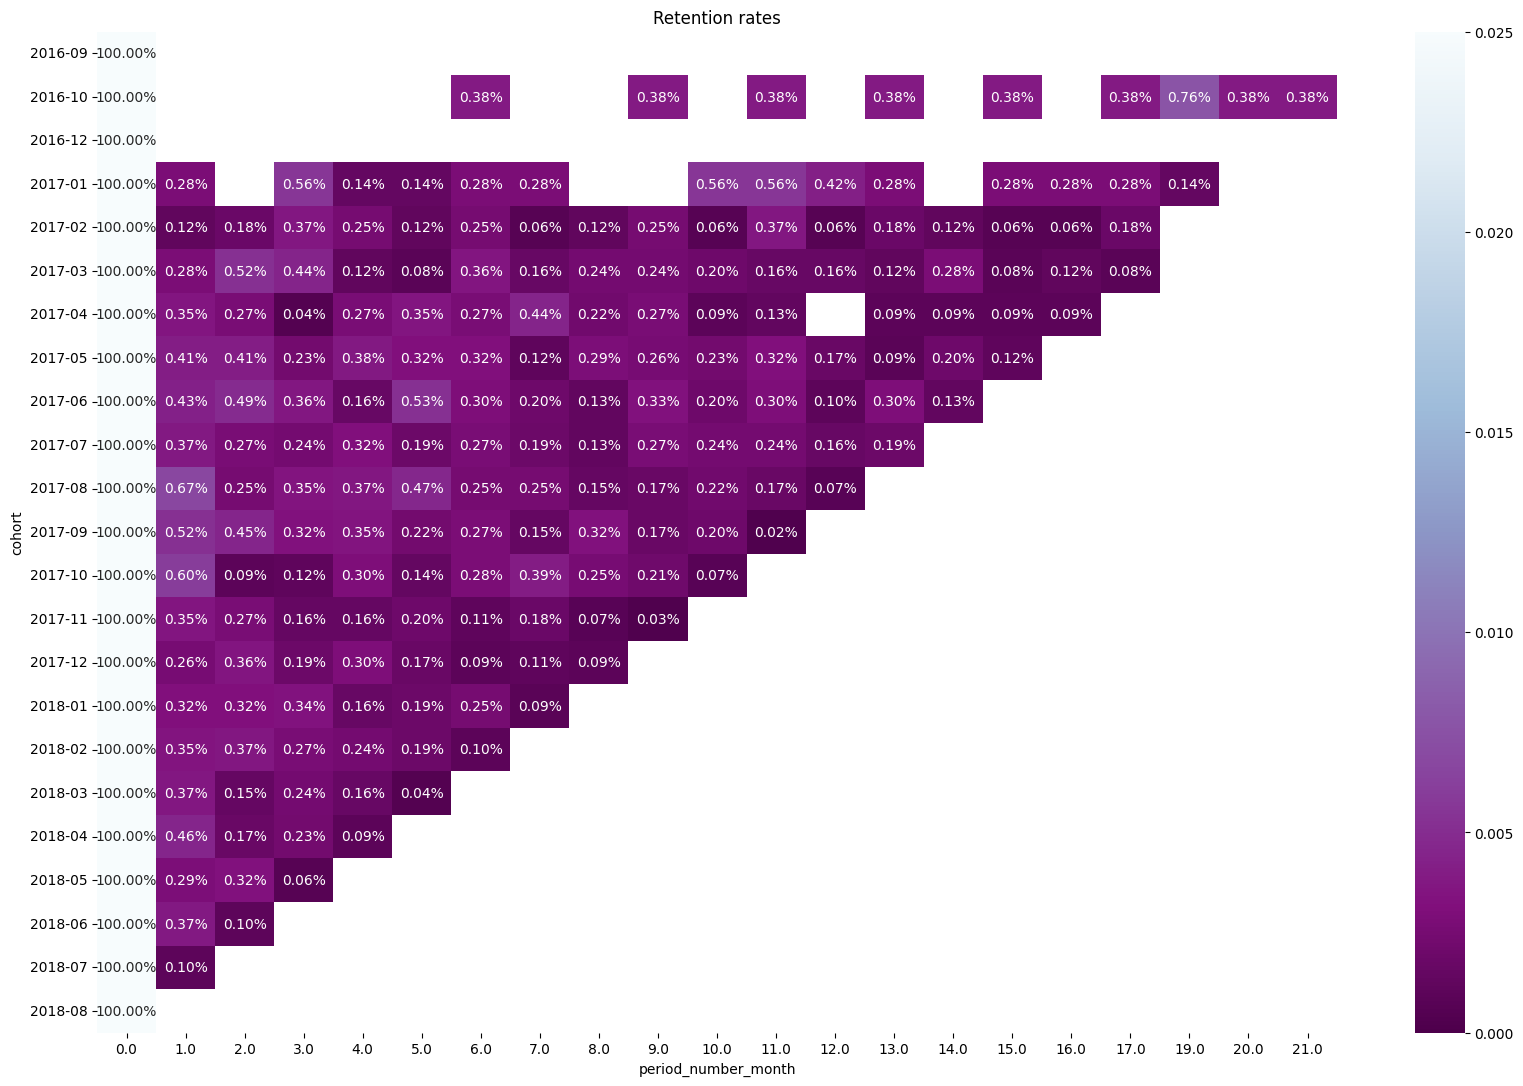

In [25]:
plt.figure(figsize=(20, 13))
plt.title('Retention rates')
sns.heatmap(data=retention_matrix, annot = True, fmt = '.2%', vmin = 0.0, vmax = 0.025, cmap="BuPu_r")
plt.show()

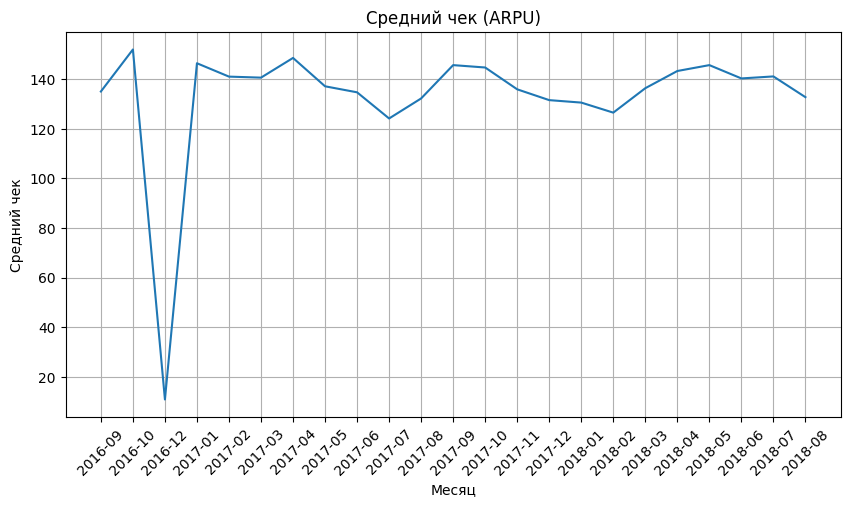

In [ ]:
# 5. ARPU - Средний чек
fifth_metric = metrics.groupby('cohort').agg(
    total_sales=('price', 'sum'),
    n_orders=('order_id', 'nunique')).reset_index()

fifth_metric['ARPU'] = fifth_metric['total_sales'] / fifth_metric['n_orders']

plt.figure(figsize=(10, 5))
plt.plot(fifth_metric['cohort'].astype(str), fifth_metric['ARPU'])
plt.title('Средний чек (ARPU)')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## **Выводы по задаче 3** ##

**В строках выше были рассчитаны и визуализированы наиболее приоритетные метрики для продукт-менеджера. Они включают в себя:**
- **GMV (Gross Merchandise Volume) - Общий объем продаж;**
- **Active Customers - Размер аудитории;**
- **Конверсия новых пользователей;**
- **Retention Rate - Вовлеченность клиента в продукт;**
- **ARPU - Средний чек.**

**Данные метрики позволяют увидеть рост того или иного показателя, который остро необходим в работе в клиентами.**

**Отчетливо видно, что объем продаж и объем аудитории растут, а средний чек стабильно держится на с января месяца 2017 года. Также видно, что средний чек в основном растет от февраля до конца апреля и от июля до августа. При этом, понижается от конца апреля до конца июня и от конца августа до февраля.**


## Задача 4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE. ##

Посмотрев с продактом на когортный анализ и метрики, вы решили, что нужно изменить продукт. Метрики необходимо срочно повышать. Вместе с командой вы сформулировали 3 гипотезы, в которые вы верите. По каждой гипотезе команда заполнила показатели по Ease, Confidence. Вам нужно заполнить самый важный показатель — Impact. Для этого вам требуется:

Выбрать одну из трёх основных гипотез с помощью фреймворка ICE, которые были сформированы продактом и, кажется, должны улучшить пользовательский опыт в маркетплейсе.

Для расчёта Impact возьмите данные с июня 2017 года. Считайте, что конверсия в повторный заказ равна величине медианного retention 1-го месяца.

**Гипотеза №1**

Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

**Гипотеза №2**

Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

**Гипотеза №3**

Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

In [ ]:
conversion = first_month_retention
hyphotesis = pd.merge(orders, order_items, on='order_id', how='inner')
hyphotesis = pd.merge(hyphotesis, customers, on='customer_id')
hyphotesis = hyphotesis.query('order_purchase_timestamp >= "2017-06-01"')
hyphotesis.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_delay,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,3.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
def impact_translate(impact):
  if 0 <= impact <= 50:
    return 1
  elif 51 <= impact <= 150:
    return 2
  elif 151 <= impact <= 350:
    return 3
  elif 351 <= impact <= 750:
    return 4
  elif 751 <= impact <= 1550:
    return 5
  elif 1551 <= impact <= 3150:
    return 6
  elif 3151 <= impact <= 6350:
    return 7
  elif 6351 <= impact <= 12750:
    return 8
  elif 12751 <= impact <= 25550:
    return 9
  elif 25551 <= impact <= 51150:
    return 10
  elif impact > 51150:
    return 10

ice = pd.DataFrame(columns=['impact', 'confidence', 'ease', 'ICE'])
ice['confidence'] = [8, 10, 5]
ice['ease'] = [6, 4, 9]

# Гипотеза 1
orders_filtered = orders.query('order_purchase_timestamp >= "2017-06-01"')
canceled_orders = orders_filtered[orders_filtered['order_status'] == 'canceled'].shape[0]
impact_1 = canceled_orders + canceled_orders * conversion
ice.loc[0, 'impact'] = impact_translate(impact_1)

In [ ]:
# Гипотеза 2
delay_orders = orders_filtered[orders_filtered['order_delivered_customer_date'] > orders_filtered['order_estimated_delivery_date']].shape[0]
impact_2 = delay_orders + delay_orders * conversion
ice.loc[1, 'impact'] = impact_translate(impact_2)

In [ ]:
# Гипотеза 3
customers_1 = hyphotesis.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='order_count')
leak_customers = customers_1[customers_1['order_count'] == 1]['customer_unique_id']
impact_3 = leak_customers.shape[0] + leak_customers.shape[0] * conversion

In [ ]:
# Рассчет общего ICE
ice.loc[2, 'impact'] = impact_translate(impact_3)
ice['ICE'] = ice['confidence'] * ice['ease'] * ice['impact']
ice

,impact,confidence,ease,ICE
0,4,8,6,192
1,8,10,4,320
2,10,5,9,450


## Выводы по задаче 4 ##

**Топ-гипотеза:**
**"Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов." (ICE = 450)**

**Impact (10): Ожидаемый рост повторных покупок на 10%.**

**Confidence (5): Данные аналогичных маркетплейсов показывают +10-15% конверсии,  а также имеются иссследования на пользователях.**

**Ease (9): Требует интеграции с платежными системами (1 спринт).**

**Альтернативы:**

**Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.**
**(ICE = 192, имеет довольно небольшой impact - 2-3%)**

**Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.**
**(ICE = 320, имеет довольно сложную реализацию (ease))**

**Было принято решение запустить A/B-тест нового способа оплаты на 20% трафика.**

## **По итогу выбираем гипотезу №3, так как она имеет наибольшую оценку ICE.** ##

## Задача 5. Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять. ##

После предыдущего исследования у вас появилась гипотеза, которую можно реализовать для значительного улучшения метрик компании. Вы предложили использовать A/B-тестирование для проверки её эффективности.

Продакт попросил вас:

  - Сформулировать метрики, на которые должна повлиять выбранная вами гипотеза.

  - Сформулировать хотя бы по одной метрике в категории: целевые, прокси, guardrail.

Выбранная гипотеза должна повлиять на конверсию в повторный заказ и на среднее количество заказов на клиента.

In [ ]:
# Конверсия в повторный заказ
customers_2 = hyphotesis.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='order_count')
total_usr = hyphotesis['customer_unique_id'].nunique()
repeat_conversion = customers_2['order_count'] / total_usr * 100
repeat_conversion.mean()

# Среднее количество заказов на клиента
total_orders = hyphotesis['order_id'].nunique()
avg_orders = total_orders / leak_customers.shape[0]

print(f"Конверсия в повторный заказ: {repeat_conversion.mean():.4f}")
print(f"Среднее количество заказов на клиента: {avg_orders:.3f}")

Конверсия в повторный заказ: 0.0012
Среднее количество заказов на клиента: 1.061


## Выводы по задаче 5 ##

**Целевые метрики** - Прямо измеряют успех гипотезы, их я решил даже реализовать:)

Они рассчитаны строкой выше. Я беру именно такие метрики, потому что они позволят довольно быстро увидеть результат применения новой гипотезы и ее влияние на рост выручки. В нашем случае данные метрики очень плохие, так как конверсия должна быть хотя бы 2-3%, а среднее кол-во заказов хотя бы 1.2-1.3.

**Прокси метрики** - Косвенно измеряют успех гипотезы.

Такой метрикой является Снижение процента отказа от корзины. Это все заказы в корзине, деленные на НЕ оплаченные заказы в корзине. Данная метрка позволяет посмотреть насколько часто люди откладывают заказы в дальний ящик и в последующем разобраться, почему так. Однако, по ней не получится выявить, растет ли прибыль.

**Guardrail-метрики (Контрольные метрики)** - они защищают от негативных последствий.

Тут можно использовать Стабильность успешных оплат. Эта метрика описывает % успешных транзакций (без ошибок). Если она становится ниже 95%, то это сигнал о тревоге, иначе большинство пользователей уйдет и расходы начнут превышать доходы. А вернуть пользователей крайне сложно:(

# Общие выводы по итогу исследования #

**Ключевые выводы исследования**

Присутствуют сильные проблемы с удержанием клиентов: очень низкий retention - почти 99% клиентов не совершают повторных покупок.

Основные причины: задержки доставки и сложный процесс оплаты.

Product/Market Fit почти отсутствует и близится к нулю:
MAU и Retention постоянно убывают.

На нашм маркетплейсе есть неиспользованный потенциал монетизации, потому что сейчас он реализован плохо и люди зачастую не могут оплатить свой заказ.

Только 0.12% клиентов совершают повторные покупки.

### Рекомендации по продукту ###

1. Оптимизация платежного опыта (срочно, 1-3 мес.)
Действия:

Внедрить упрощенную оплату (сохранение карты).

Добавить оплату в рассрочку для категорий > 10 000.


2. Улучшение логистики (не очень срочно, 3-6 мес.)
Действия:

Партнерство с локальными складами в проблемных штатах для устрорения доставки.

Внедрить систему трекинга доставки в реальном времени.


3. Программы лояльности (не срочно, 6+ мес.)
Действия:

Запустить бесплатную доставку товаров.
